<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Machine%20Learning%20Course/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Exploratory Data Analysis for Cars Price Prediction**</center>

Exploratory data analysis (EDA) is used by data scientists to analyze data sets and summarize their main characteristics, often employing data visualization methods. 

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers, find interesting relations among the variables.

Based on the results of EDA in real world, companies make business decisions to increase their profits.

reference: https://youtube.com/shorts/dfRi4KtdFSY?feature=share


Exploratory data analysis (EDA), Data Preprocessing, and Feature Engineering are all distinct terms, but they are comprised of a large number of subtasks that are overlapping in nature. At times, they are sometimes used in the same sentence as one another.

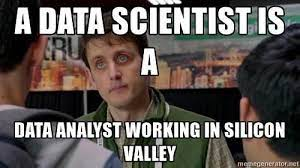</center>


Exploratory data analysis is a way to better understand your data which helps in further Data preprocessing using feature engineering techniques. 


In [ ]:
# importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

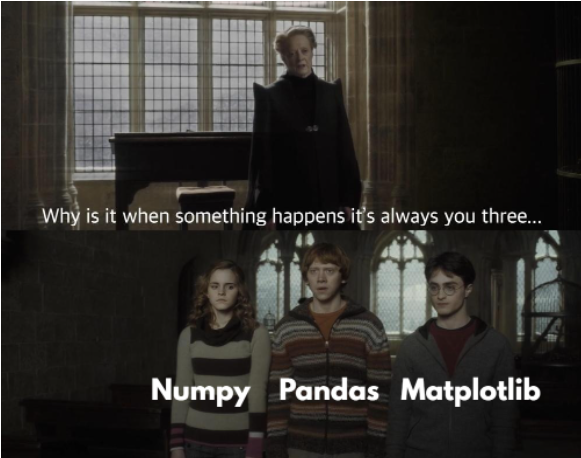

In [ ]:
# reading the file
path = "https://drive.google.com/uc?export=download&id=1_GcSxqk41IClDjSFg1nQndRsC9gPozgV"
df = pd.read_csv(path)
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

### Check the datatypes
In Machine learning, it is very important to know appropriate datatypes of independent and dependent variable. as it provides the basis for selecting classification or regression models. Incorrect identification of data types leads to incorrect modeling which in turn leads to an incorrect solution.

In [ ]:
# check datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


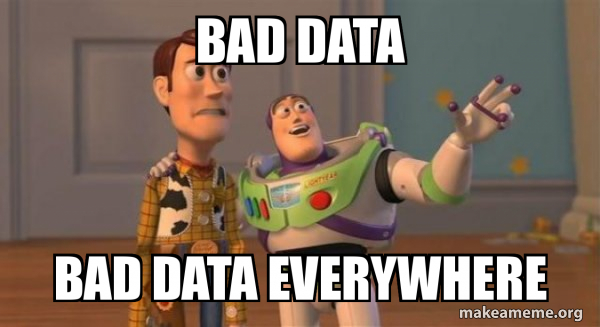

### Dropping Duplicate Rows
Datasets that contain duplicates may contaminate training data with the test data or vice versa, entries with missing values will lead models to misunderstand features and outliers will undermine the training process – leading your model to “learn” patterns that do not exist in reality.

In [ ]:
# check for non-null values in each column
df.count()

name             8128
year             8128
selling_price    8128
km_driven        8128
fuel             8128
seller_type      8128
transmission     8128
owner            8128
mileage          7907
engine           7907
max_power        7913
torque           7906
seats            7907
dtype: int64

In [ ]:
# drop duplicates
df = df.drop_duplicates()
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [ ]:
# check count of non-null values in each column
df.count()

name             6926
year             6926
selling_price    6926
km_driven        6926
fuel             6926
seller_type      6926
transmission     6926
owner            6926
mileage          6718
engine           6718
max_power        6721
torque           6717
seats            6718
dtype: int64

### Dropping missing values

In [ ]:
# check for count of null values in each column
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [ ]:
# drop missing values
df = df.dropna() 

In [ ]:
# Make sure that missing values are removed
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


### Feature Splitting
Splitting features is a good way to make them useful in terms of machine learning. Most of the time the dataset contains string columns that violates tidy data principles. By extracting the utilizable parts of a column into new features: We enable machine learning algorithms to comprehend them.

In [ ]:
# split mileage, engine and max_power to remove its units and keep only numerical values
df['mileage'] = df["mileage"].str.split(" ",expand=True)[0]
df['mileage'] = df['mileage'].astype('float64')
df['engine'] = df["engine"].str.split(" ",expand=True)[0]
df['engine'] = df['engine'].astype('float64')
df['max_power'] = df["max_power"].str.split(" ",expand=True)[0]
df['max_power'] = df['max_power'].astype('float64')

In [ ]:
# feature splitting on brand names
df['brand'] = df['name'].str.split(" ",expand=True)[0] + ' ' + df['name'].str.split(" ",expand=True)[1]
df['brand'].value_counts()

Maruti Swift       620
Maruti Alto        394
Hyundai i20        303
Maruti Wagon       245
Toyota Innova      188
                  ... 
Renault Koleos       1
Nissan Teana         1
Skoda Yeti           1
Force Gurkha         1
Maruti S-Presso      1
Name: brand, Length: 200, dtype: int64

The **describe()** function computes a summary of statistics related to the DataFrame numerical columns. This function gives the mean, std and IQR values.

In [ ]:
# use describe function
df.describe()

year  selling_price     km_driven      mileage       engine  \
count  6717.000000   6.717000e+03  6.717000e+03  6717.000000  6717.000000   
mean   2013.611136   5.263860e+05  7.339834e+04    19.466585  1430.985857   
std       3.897402   5.235504e+05  5.870328e+04     4.048102   493.469198   
min    1994.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.800000e+04    16.800000  1197.000000   
50%    2014.000000   4.200000e+05  6.820300e+04    19.440000  1248.000000   
75%    2017.000000   6.500000e+05  1.000000e+05    22.500000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  6717.000000  6717.000000  
mean     87.766100     5.434271  
std      31.724555     0.983805  
min      32.800000     2.000000  
25%      67.100000     5.000000  
50%      81.830000     5.000000  
75%     100.000000     5.000000  
max     400.000000    14.000000

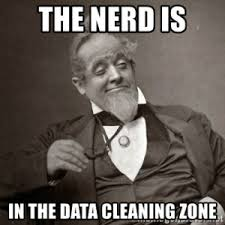

### Feature Creation
Sometimes we need to create new features so that our data makes more sense and it becomes easy for model to learn and intepret.

Example, we have a column 'year' which represents in which year, the car was bought. But, if we create a new feature that shows how old the car is, it makes more sense then to use it to decide price of a car for our model.  

In [ ]:
# create a new feature which shows how old the car is
current_year = 2022
df['old'] = current_year - df['year']
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   Third Owner    17.70  1497.0      78.00   
3  Individual       Manual   First Owner    23.00  1396.0      90.00   
4  Individual       Manual   First Owner    16.10  1298.0      88.20   

                     torque  seats         brand  old  
0            190Nm@ 2000rpm    5.0  Maruti Swift    8  
1       250Nm@ 1500-2500rpm    5.0   Skoda Rapid    8  
2     12.7@ 2,700(kgm@ rpm)    5.0    Honda City   16  
3  22.4 kgm at 1750-2750rpm    5.0   Hyundai i20   12  
4     11.5@ 4,500(kgm@ rpm)    5.0  Maruti Swift   15

### Dropping irrelevant columns
Useless columns can dangerously mislead our model that's why it is important to drop them.

In [ ]:
# drop name, year and torque column
cols_to_drop = ['name','year','torque']
df.drop(cols_to_drop,axis=1,inplace=True)

### Renaming the columns
You can rename the column in Pandas dataframe using the df. rename( columns={“Old Column Name”:”New Column Name” } ,inplace=True) statement.

Example, here, rename the following columns.

'selling_price' : 'price', 'km_driven' : 'kms', 'seller_type' : 'seller', 'max_power' : 'power'

In [ ]:
# rename the columns as shown above 
renamed_columns = {'selling_price':'price','km_driven':'kms','seller_type':'seller','max_power':'power'}
df = df.rename(columns = renamed_columns)
df.head()

price     kms    fuel      seller transmission         owner  mileage  \
0  450000  145500  Diesel  Individual       Manual   First Owner    23.40   
1  370000  120000  Diesel  Individual       Manual  Second Owner    21.14   
2  158000  140000  Petrol  Individual       Manual   Third Owner    17.70   
3  225000  127000  Diesel  Individual       Manual   First Owner    23.00   
4  130000  120000  Petrol  Individual       Manual   First Owner    16.10   

   engine   power  seats         brand  old  
0  1248.0   74.00    5.0  Maruti Swift    8  
1  1498.0  103.52    5.0   Skoda Rapid    8  
2  1497.0   78.00    5.0    Honda City   16  
3  1396.0   90.00    5.0   Hyundai i20   12  
4  1298.0   88.20    5.0  Maruti Swift   15

### Handling Outliers

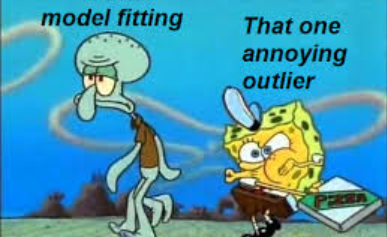

In [ ]:
# show df columns with numerical datatypes
df.loc[:, df.dtypes != object]

price     kms  mileage  engine   power  seats  old
0     450000  145500    23.40  1248.0   74.00    5.0    8
1     370000  120000    21.14  1498.0  103.52    5.0    8
2     158000  140000    17.70  1497.0   78.00    5.0   16
3     225000  127000    23.00  1396.0   90.00    5.0   12
4     130000  120000    16.10  1298.0   88.20    5.0   15
...      ...     ...      ...     ...     ...    ...  ...
8121  260000   50000    18.90   998.0   67.10    5.0    9
8122  475000   80000    22.54  1396.0   88.73    5.0    8
8123  320000  110000    18.50  1197.0   82.85    5.0    9
8124  135000  119000    16.80  1493.0  110.00    5.0   15
8125  382000  120000    19.30  1248.0   73.90    5.0   13

[6717 rows x 7 columns]

### Boxplot for Outliers
- A boxplot is a graph that gives you a good indication of how the values in the data are spread out. 
- They are generally used to visualise outliers in the data.




#### boxplot - price

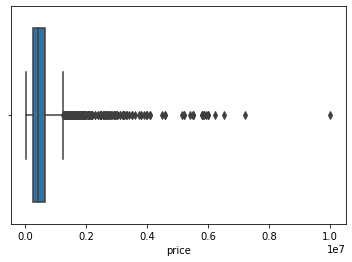

In [ ]:
# show the boxplot for price column to look at outliers 
sns.boxplot(x=df['price'])
plt.show()

As it is our target column, and outliers in target columns are sometimes important to understand the trend, that's why we are going to keep outliers here, but for other independent columns, we'll remove the outliers.

#### old - handling outliers
Now we will apply handling outlier's for "old" column using Capping the outliers method that we learnt in feature engineering module.

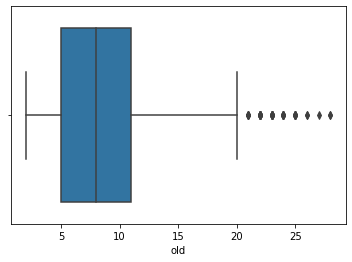

In [ ]:
# show the boxplot for price column to look at outliers 
sns.boxplot(x=df['old'])
plt.show()

In [ ]:
# set the upper limit and lower limit and apply it for outliers
upper_lim = df['old'].quantile(0.95)
lower_lim = df['old'].quantile(0.05)
df.loc[(df['old'] > upper_lim),'old'] = upper_lim
df.loc[(df['old'] < lower_lim),'old'] = lower_lim

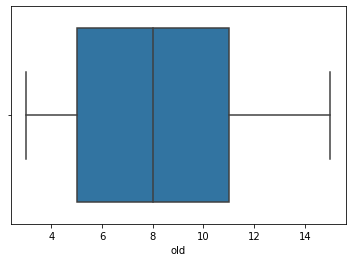

In [ ]:
sns.boxplot(x=df['old'])
plt.show()

#### power - handling outliers
Repeat the same method for "power" column.

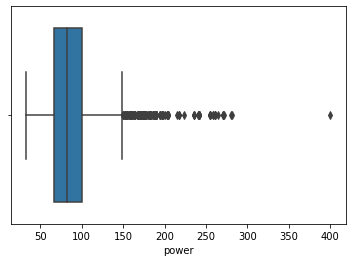

In [ ]:
# show the boxplot for "power" column
sns.boxplot(x=df['power'])
plt.show()

In [ ]:
# Capping the outliers
upper_lim = df['power'].quantile(0.95)
lower_lim = df['power'].quantile(0.05)
df.loc[(df['power'] > upper_lim),'power'] = upper_lim
df.loc[(df['power'] < lower_lim),'power'] = lower_lim

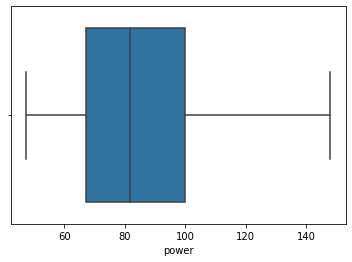

In [ ]:
# show the boxplot and observe the difference
sns.boxplot(x=df['power'])
plt.show()

#### kms - handling outliers
Now we will apply handling outlier's for "kms" column using Standard deviation based method that we learnt in feature engineering module.

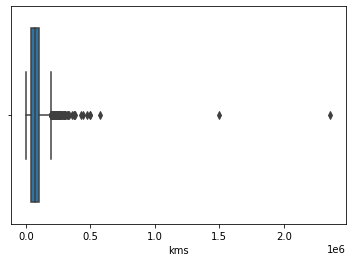

In [ ]:
# show the boxplot for 'kms' column
sns.boxplot(x=df['kms'])
plt.show()

In [ ]:
# set the upper limit and lower limit for removing the outliers
factor = 3
upper_lim = df['kms'].mean() + df['kms'].std() * factor
lower_lim = df['kms'].mean() - df['kms'].std() * factor

In [ ]:
# apply that change on new data
df = df[(df['kms'] < upper_lim) & (df['kms'] > lower_lim)]

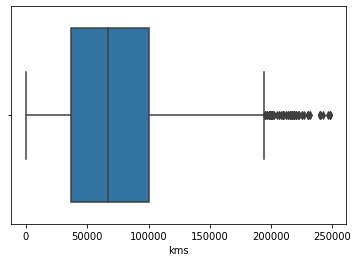

In [ ]:
# show the boxplot and observe the change
sns.boxplot(x=df['kms'])
plt.show()

In this module we'll learn new Handling Outlier's Method:

### Inter Quantile Range(IQR)
The interquartile range defines the difference between the third and the first quartile. Quartiles are the partitioned values that divide the whole series into 4 equal parts. So, there are 3 quartiles. First Quartile is denoted by Q1 known as the lower quartile, the second Quartile is denoted by Q2 and the third Quartile is denoted by Q3 known as the upper quartile. Therefore, the interquartile range is equal to the upper quartile minus lower quartile.



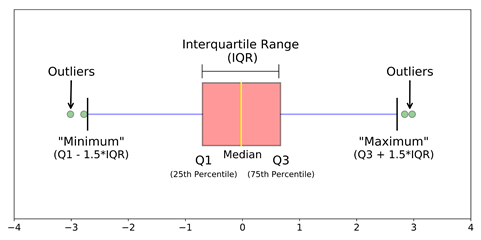

Steps to eliminate outliers:
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute IQR=Q3-Q1
- give a suitable threshold and compute lower bound = (Q1–1.5\*IQR), upper bound = (Q3+1.5\*IQR)
- eliminate those above upper bound and those below lower bound

#### engine - handling outliers

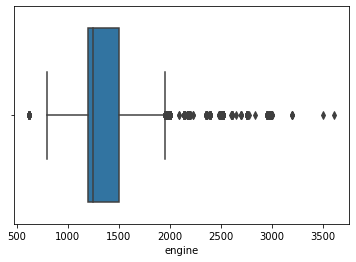

In [ ]:
# show the boxplot for "engine" column
sns.boxplot(x=df['engine'])
plt.show()

In [ ]:
# set q1 and q3 values, determine IQR, set upper bound and lower bound and apply it on our DataFrame df for 'engine' column
q1 = df['engine'].quantile(0.25)
q3 = df['engine'].quantile(0.75)
IQR = q3 - q1 
lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)
df = df[~((df['engine'] < lower_bound) | (df['engine'] > upper_bound))]

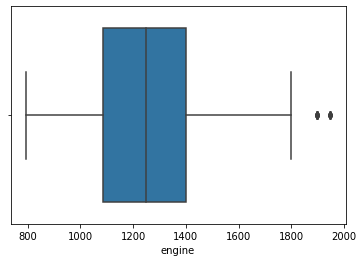

In [ ]:
# show the boxplot for 'engine' column and observe the difference
sns.boxplot(x=df['engine'])
plt.show()

#### mileage - handling outliers
We will repeat same method for mileage column now.

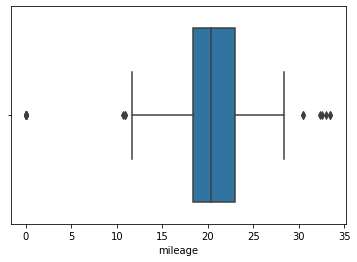

In [ ]:
# show the boxplot for 'mileage' column
sns.boxplot(x=df['mileage'])
plt.show()

In [ ]:
# set q1 and q3 values, determine IQR, set upper bound and lower bound and apply it on our DataFrame df for 'mileage' column
q1 = df['mileage'].quantile(0.25)
q3 = df['mileage'].quantile(0.75)
IQR = q3 - q1 
lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)
df = df[~((df['mileage'] < lower_bound) | (df['mileage'] > upper_bound))]

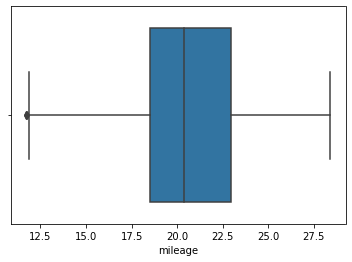

In [ ]:
# show the boxplot for 'mileage' column and observe the difference
sns.boxplot(x=df['mileage'])
plt.show()

### DataFrame Index
Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame. We try to keep it as much uniform and as much easily accessible for us to use. That's why it is important to clean irregular DataFrame indexes.

In [ ]:
# check the index of dataframe
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8115, 8116, 8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125],
           dtype='int64', length=5477)

As you can see, the dataframe index is irregular above, ranges from 0 to 8125, yet has length of 5477. That's why it is important to correct our dataframe index. 

In [ ]:
# reset the index 
df.reset_index(inplace=True,drop=True)
# reset_index will delete the index instead of inserting it back into the columns of the DataFrame
# if we don't do drop=True, then it will create a column in our df which will contain the old index values
df.tail()

price     kms    fuel      seller transmission                 owner  \
5472  260000   50000  Petrol  Individual       Manual          Second Owner   
5473  475000   80000  Diesel  Individual       Manual          Second Owner   
5474  320000  110000  Petrol  Individual       Manual           First Owner   
5475  135000  119000  Diesel  Individual       Manual  Fourth & Above Owner   
5476  382000  120000  Diesel  Individual       Manual           First Owner   

      mileage  engine   power  seats          brand  old  
5472    18.90   998.0   67.10    5.0   Maruti Wagon    9  
5473    22.54  1396.0   88.73    5.0    Hyundai i20    8  
5474    18.50  1197.0   82.85    5.0    Hyundai i20    9  
5475    16.80  1493.0  110.00    5.0  Hyundai Verna   15  
5476    19.30  1248.0   73.90    5.0   Maruti Swift   13

## Data Visualization

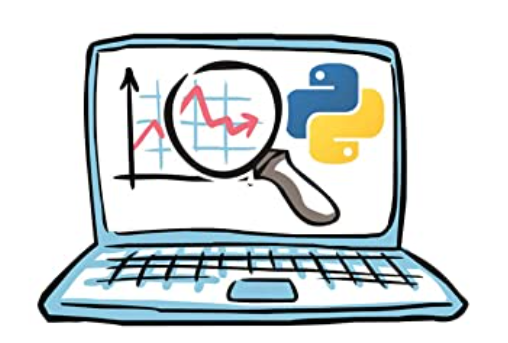

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data. It helps data scientists perform complex data analysis, recognizing patterns, and understanding datasets.




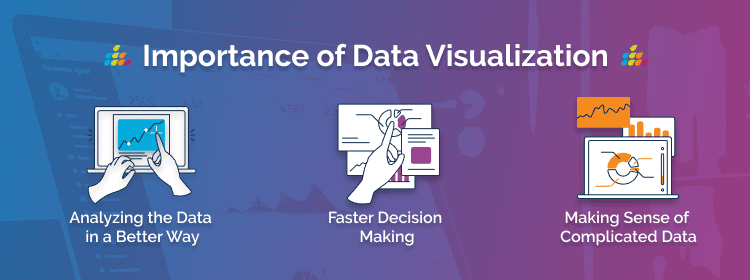

### Useful packages for visualizations in python
#### Matplotlib
Matplotlib is a visualization library in Python for 2D plots of arrays. It is written in Python and makes use of the NumPy library. Matplotlib comes with a wide variety of plots like line, bar, scatter, histogram, etc. which can help us, deep-dive, into understanding trends, patterns, correlations. 

#### Seaborn
Seaborn is a dataset-oriented library for making statistical representations in Python. It is developed on top of matplotlib and to create different visualizations. It is integrated with pandas data structures.

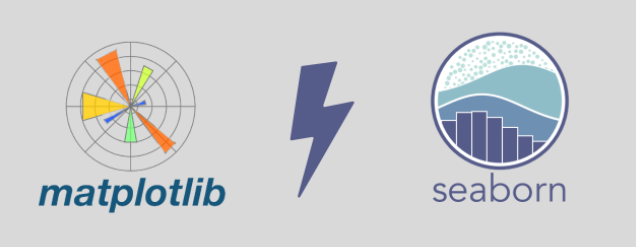

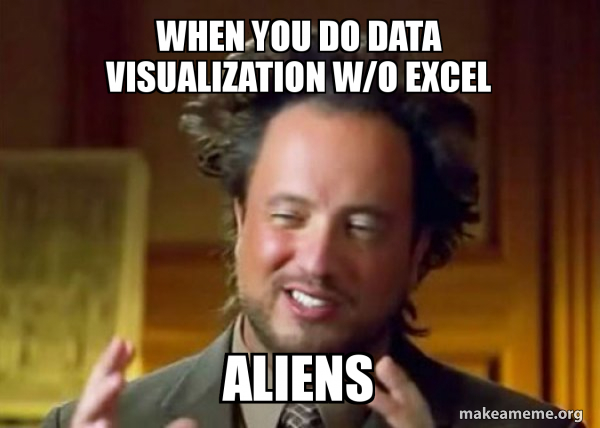

## Visualizing Univariate Distributions
- Univariate data visualization plots help us to analyse and understand the properties of a particular column(variable) in our dataset. 
- Univariate analysis is basically the simplest form to analyze data. Uni means one and this means that the data has only one kind of variable. 
- The major reason for univariate analysis is to use the data to describe. The analysis will take data, summarise it, and then find some pattern in the data. 


**1. Histogram & Density Plots** 

- Creating the histogram provides the Visual representation of data distribution. 
- By using a histogram we can represent a large amount of data, and its frequency. 
- Density Plot is the continuous and smoothed version of the Histogram estimated from the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


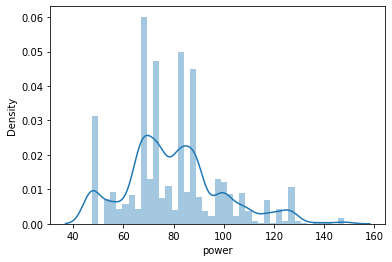

In [ ]:
# Plot a histogram for "power" col
sns.distplot(df['power'])
plt.show()

Plot all the numerical columns together present in our dataframe

In [ ]:
# make a list of all the columns which contain numerical values
num_cols = list(df.loc[:, df.dtypes != object].columns)
num_cols

['price', 'kms', 'mileage', 'engine', 'power', 'seats', 'old']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

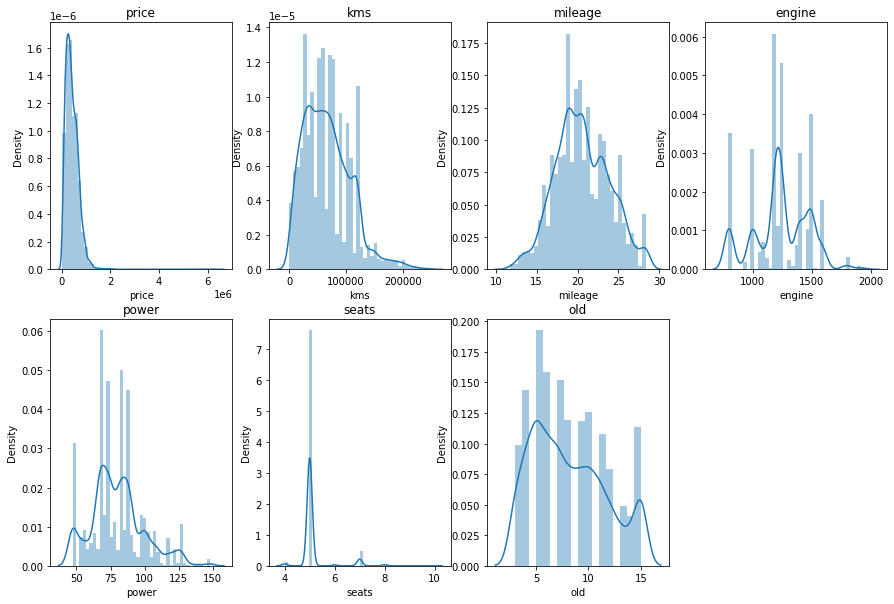

In [ ]:
# plot all the columns present in num_cols together using subplot of dimention (2,3).
c=0
plt.figure(figsize=(15,10))
for i in num_cols:
 c=c+1
 plt.subplot(2, 4, c)
 plt.title(i)
 sns.distplot(df[i])
plt.show()

**2. Bar Plot**

- A barplot (or barchart) is one of the most common types of graphic. 
- It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. 
- The size of the bar represents its numeric value.

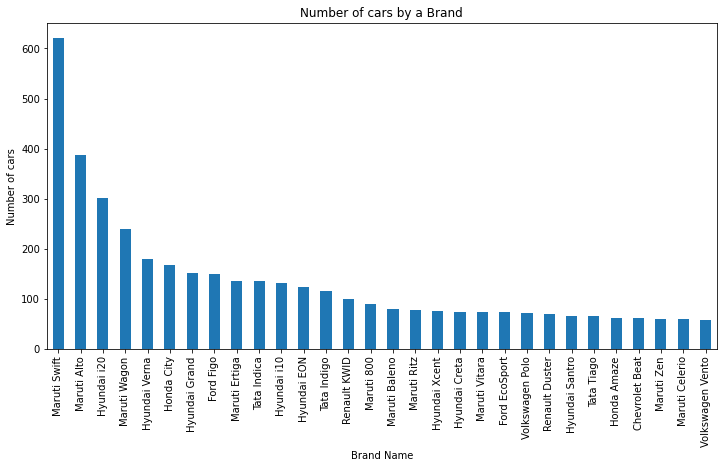

In [ ]:
# Plot a bar graph for number of cars vs each brand
plt.figure(figsize = (12,8))
df.brand.value_counts().nlargest(30).plot(kind='bar',figsize=(12,6))
plt.title('Number of cars by a Brand')
plt.ylabel('Number of cars')
plt.xlabel('Brand Name');

**3. Count Plot**
- A countplot is kind of like a histogram or a bar graph used for categorical data. 
- It simply shows the number of occurrences(frequency) of a different classes present in the column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


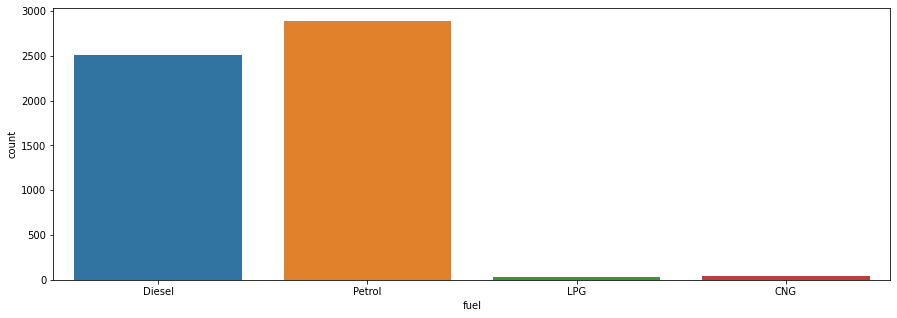

In [ ]:
# Show a countplot for "fuel" col
plt.figure(figsize=(15,5))
sns.countplot(df['fuel'])
plt.show()

**4. Pie Plot**
- Pie plots or pie charts are used to present categorical data in a format that highlights how each data point contributes to a whole, that is 100%.
- It is a circular statistical graphical chart, divided into slices that illustrate numerical proportions in data.

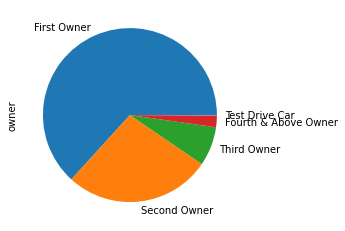

In [ ]:
# plot the pie chart of seller categories
df.owner.value_counts(normalize=True).plot.pie()
plt.show()

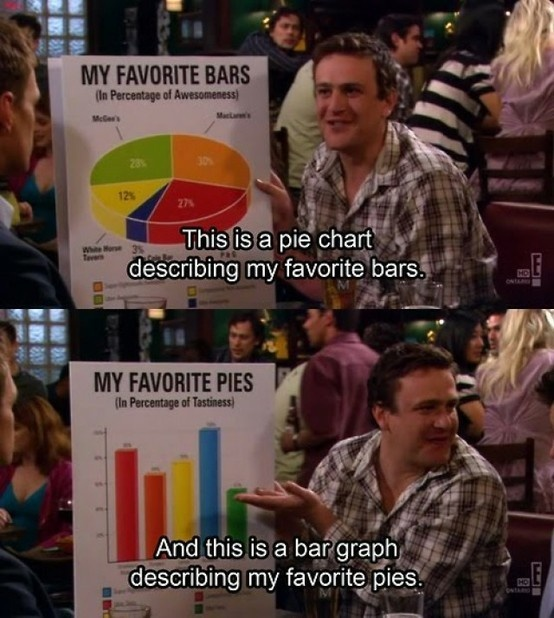

## Visualizing Bivariate Distributions
- Bivariate analysis means the analysis of bivariate data, bi means two, so analysis of two variables. 
- It is one of the simplest forms of statistical analysis, where two variables are observed against each other.
- Analysing two variables(or columns) can help us determine the relationships between them.

**1. Scatter Plot**
- A scatter plot uses dots to represent values for two different numeric variables(or columns). 
- The position of each dot on the horizontal and vertical axis indicates values for an individual data point. 
- One column is on horizontal axis and another on vertical axis (x and y axis) and points are plot accorinding to that and this is how scatter plots are used to observe relationships between these 2 variables.

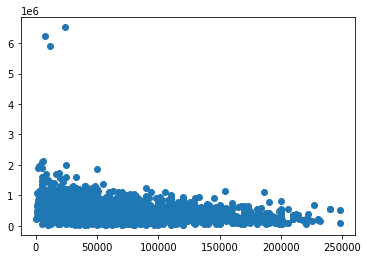

In [ ]:
# plot the scatter plot of price and kms variable in data
plt.scatter(df.kms,df.price)
plt.show()

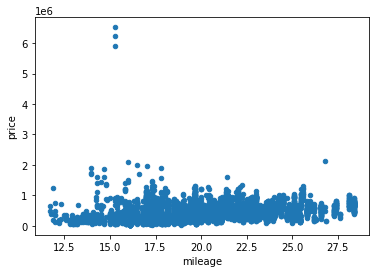

In [ ]:
# plot the scatter plot of price and  variable in data
df.plot.scatter(x="mileage",y="price")
plt.show()

**2. Line Plot**
- A line plot makes a line to represent values for two different numeric variables(or columns).
- One column is on horizontal axis and another on vertical axis (x and y axis) and points are plot accorinding to this axis.
- After this, dots are connected to form a line, which will show relationships between these 2 variables.

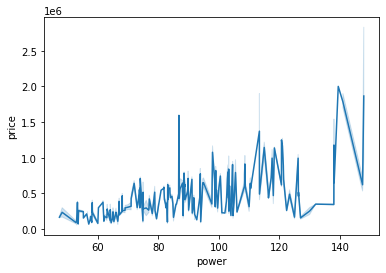

In [ ]:
# show a lineplot for "price" vs "power"
sns.lineplot(x='power',y='price',data = df)
plt.show()

**3. Box Plot**

We use this plots earlier for detecting outliers. That was an example of univariate analysis, but we will see now how we can use it for bivariate analysis.


* Boxplot is a chart that is used to visualize how a given data (variable) is distributed using quartiles.
* It makes comparing characteristics of data between categories very easy.
* We can compare the medians, spread of data, outliers and skewness for different categories in just one figure.



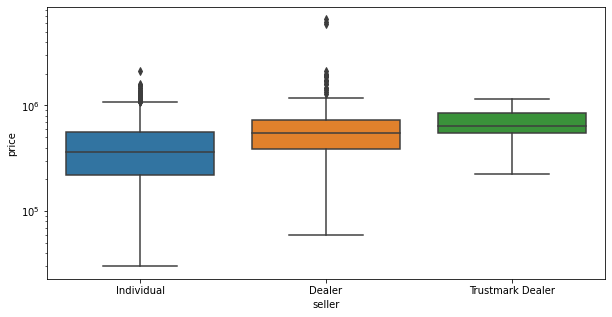

In [ ]:
# boxplot of 'price' vs 'seller'
plt.figure(figsize=(10,5))
sns.boxplot(x='seller', y='price', data=df)
plt.yscale('log')
plt.show()

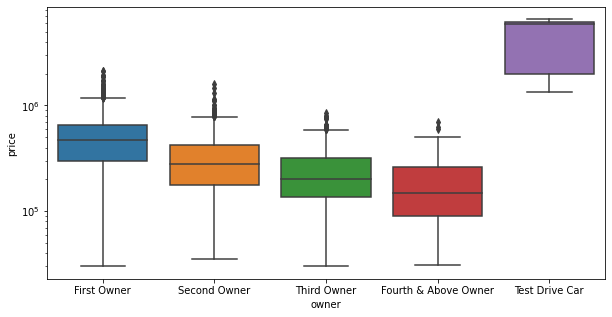

In [ ]:
# boxplot of 'price' vs 'owner'
plt.figure(figsize=(10,5))
sns.boxplot(x='owner', y='price', data=df)
plt.yscale('log')
plt.show()

**4. Violin Plot**

A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.


* A violin plot is a hybrid of a box plot and a kernel density plot, which shows distributions of numeric data for one or more groups using density curves.
* It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

Violin Plot = Box Plot + Distribution/Density Plot

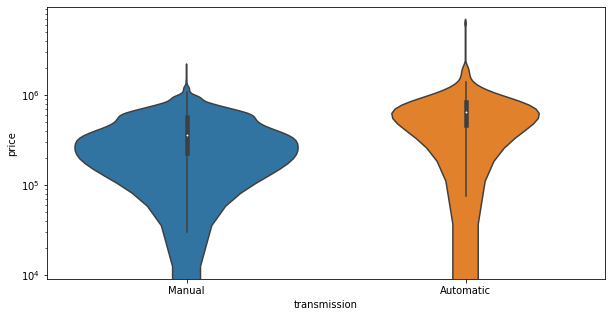

In [ ]:
# violinplot of 'price' vs 'transmission'
plt.figure(figsize=(10,5))
sns.violinplot(x='transmission', y='price', data=df)
plt.yscale('log')
plt.show()

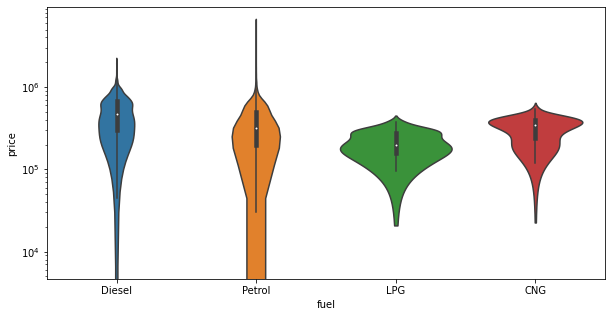

In [ ]:
# violinplot of 'price' vs 'fuel'
plt.figure(figsize=(10,5))
sns.violinplot(x='fuel', y='price', data=df)
plt.yscale('log')
plt.show()

**5. Joint Plot**

* Jointplot can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


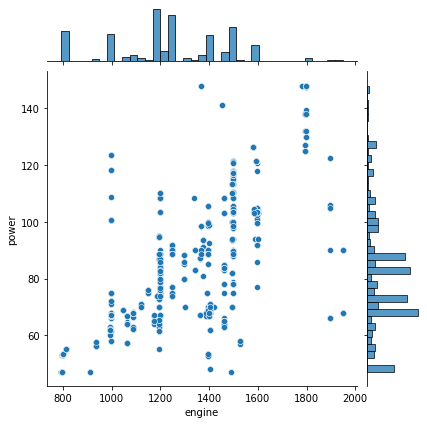

In [ ]:
# joint plot of engine and power
sns.jointplot('engine','power',df)
plt.show()

Another way of visualizing a bivariate relationship using joint plot, in particular when we have a large amount of data, is the hexplot. A hexplot splits the plotting window into several hexbins and then the number of observations which fall into each bin corresponds with a color to indicate density. A darker color hexbin means that there are more observations, or more density, within that region.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


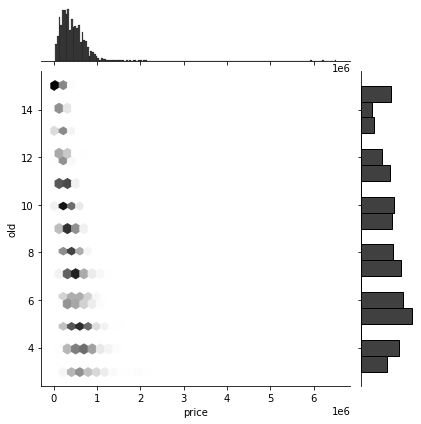

In [ ]:
# joint plot of price and old
sns.jointplot('price','old',df,kind="hex", color="k")
plt.show()

## Visualizing Multivariate Distributions
* Multivariate analysis is where we analyze multiple data dimensions or attributes (2 or more). 
* Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes. 
* You can also leverage inferential statistics and hypothesis testing if necessary based on the problem to be solved at hand to check out statistical significance for different attributes, groups and so on.

**1. Pair Plot**

* A pairplot plot a pairwise relationships in a dataset. 
*  A pairs plot allows us to see both distribution of single variables and relationships between two variables.
* The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


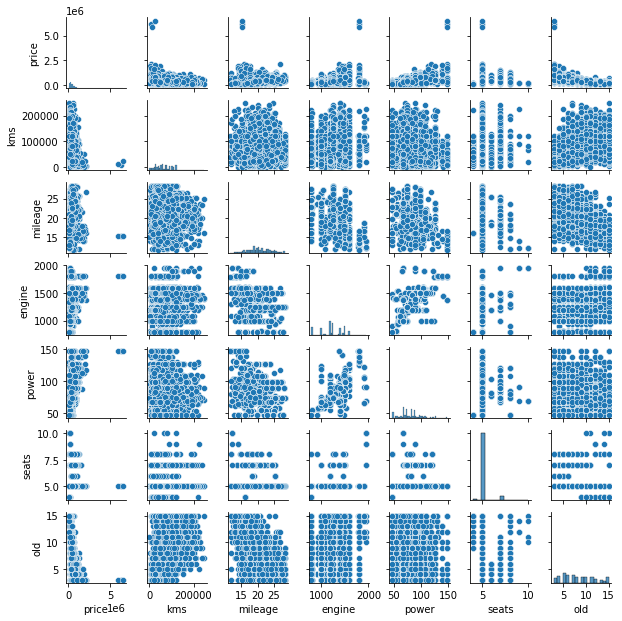

In [ ]:
# plot the pairplot for data df
sns.pairplot(df,size=1.25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


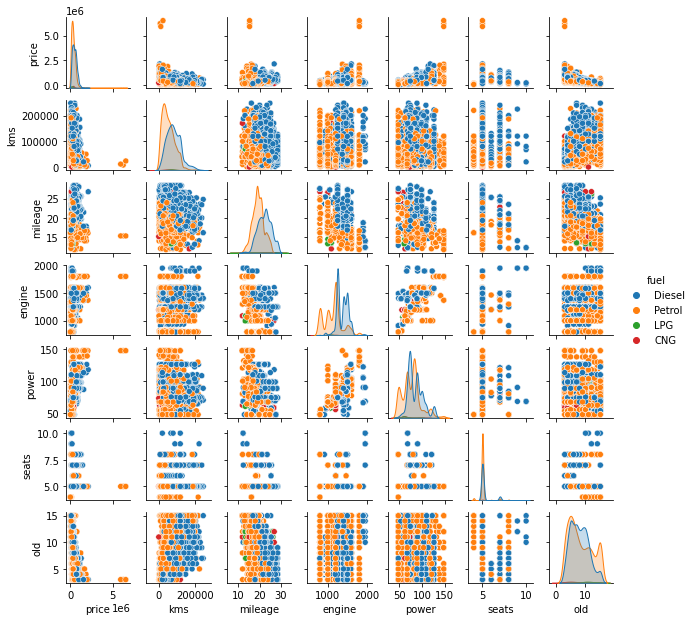

In [ ]:
# plot a pairplot for data df with hue transmission
sns.pairplot(df,hue='fuel',size=1.25)
plt.show()

**2. Multivariate Scatter Plot**

* This kind of scatterplot uses three visual variables(2 numeric and 1 categorical). 
* The horizontal position (x-value) and the vertical position (y-value) tracks values for two different numeric variables(or columns). 
* And the color (the hue parameter) tracks which of the categories from categorial column the point represents is in.
* Similar to scatter plot, we can observe relationship between 2 columns but now, with respect to each category. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


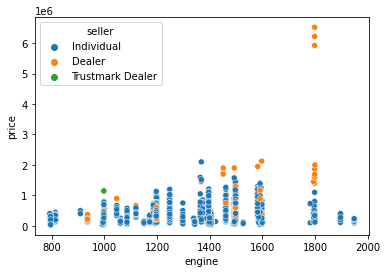

In [ ]:
# multivariate scatterplot using seaborn
sns.scatterplot(df.engine,df.price,hue=df.seller)
plt.show()

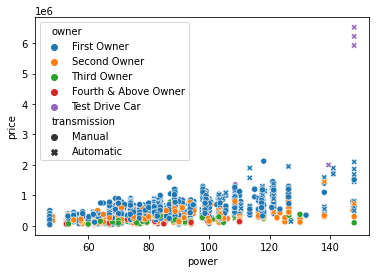

In [ ]:
# multivariate scatterplot using seaborn
sns.scatterplot(x='power',y='price',hue='owner',style='transmission',data=df)
plt.show()

**3. Multivariate Bar Plot**

* This kind of barplot uses three visual variables(1 numeric and 2 categorical).
* This works similar to Bar graph, but in addition, the previous variable is segmented to observe relationship with respect to another variable used as a hue.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


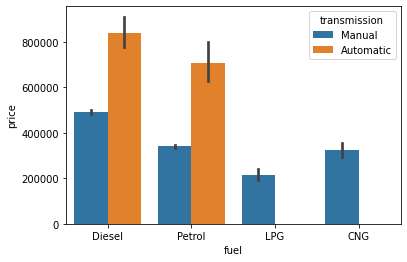

In [ ]:
# show barplot for "price" vs "fuel" and show them separately for each transmission type
sns.barplot(df['fuel'],df['price'],hue=df['transmission'])
# hue means a color or a shade so, here, hue="column name" means provide datapoints with different color for different classes of "column name"
plt.show()

**4. Heatmaps**

* A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 
* A correlation heatmap is a graphical representation of a correlation matrix representing the correlation between different variables. The value of correlation can take any value from -1 to 1.
* The color of the cell is proportional to the value representing the relation between those two variables. This means that when you look at your heat map, you can quickly see which variables are highly correlated and which aren't.

In [ ]:
# find the correlation of features of the data
train_corr = df.corr()
train_corr

price       kms   mileage    engine     power     seats       old
price    1.000000 -0.313294  0.213228  0.391130  0.560715  0.156155 -0.646738
kms     -0.313294  1.000000 -0.083047  0.214608  0.003496  0.025864  0.506775
mileage  0.213228 -0.083047  1.000000 -0.139579 -0.136386 -0.078308 -0.432364
engine   0.391130  0.214608 -0.139579  1.000000  0.806896  0.152518 -0.045036
power    0.560715  0.003496 -0.136386  0.806896  1.000000  0.104945 -0.218049
seats    0.156155  0.025864 -0.078308  0.152518  0.104945  1.000000 -0.155505
old     -0.646738  0.506775 -0.432364 -0.045036 -0.218049 -0.155505  1.000000

Text(0.5, 1.0, 'Simple Heatmap')

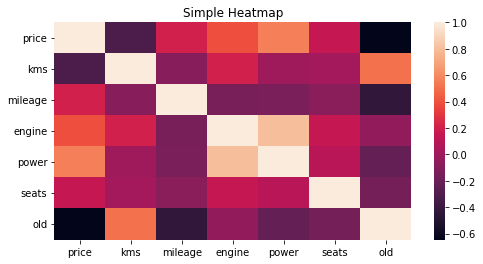

In [ ]:
# plot a simple heatmap using the correlations found above
fig,ax = plt.subplots(figsize=(8,4))
sns.heatmap(train_corr)
ax.set_title('Simple Heatmap')

Text(0.5, 1.0, 'cmap=Accent')

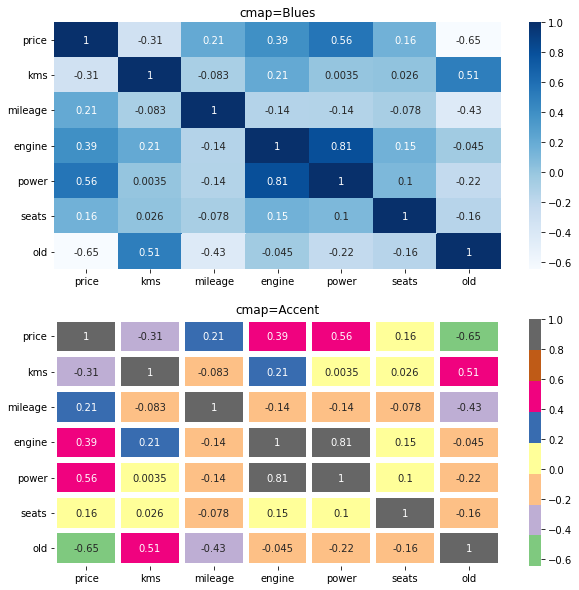

In [ ]:
# plot variants of heatmaps using different parameters of sns.heatmap 
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1,cmap="Blues")
sns.heatmap(train_corr,annot=True,ax=ax2,linewidth=5,cmap="Accent")
ax1.set_title("cmap=Blues")
ax2.set_title("cmap=Accent")

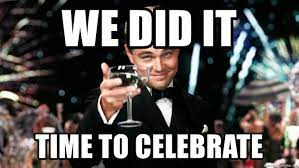
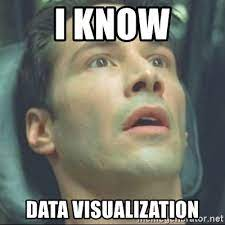

### Conclusion
EDA is a key to understand and represent your data in a better way which in result helps you to build powerful and more generalized model.

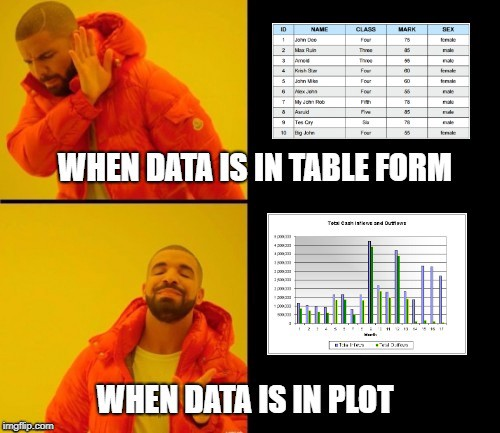


## **A Big Congratulations!** 
You have done great work, now you're an analyst. Please fill the feedback form and let us know where we can improve our service for you.

Friends, Next Get Ready to dive deeper into the field of Machine Learning, Glimpse of Future:

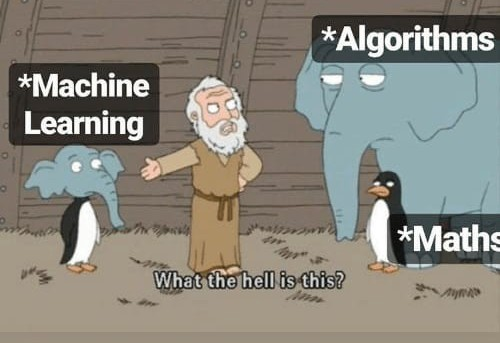